# Random Walks and Wiener Processes

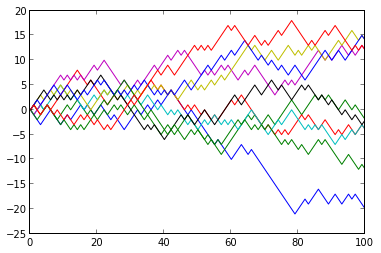

In [9]:
import numpy.random

def discrete_random_walk(size = 100):
    xs = numpy.random.choice(numpy.array([-1, 1]), size)
    xs = numpy.hstack([numpy.zeros(1), xs])
    return numpy.cumsum(xs)

# similar to 
# http://en.wikipedia.org/wiki/File:Random_Walk_example.svg
for i in xrange(10):
    plt.plot(discrete_random_walk(100))

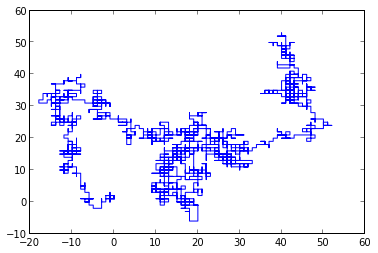

In [24]:
import numpy.random

def discrete_random_walk2d(size = 100):
    ts = numpy.array([
        [0,1],
        [0,-1],
        [1,0],
        [-1,0]
    ])
    xs = numpy.random.randint(0, high=4, size = size)
    ys = [ ts[i] for i in xs ]
    ys = numpy.array(ys)
    us = numpy.cumsum(ys[:,0])
    vs = numpy.cumsum(ys[:,1])
    plt.plot(us, vs)

# similar to
# http://en.wikipedia.org/wiki/File:Random_walk_2500.svg
discrete_random_walk2d(2500)

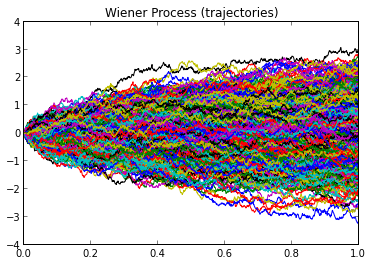

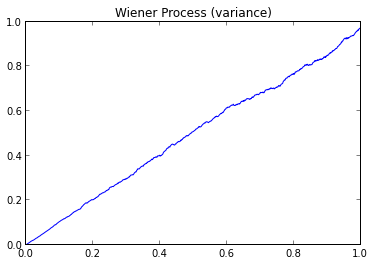

In [60]:
def wiener_process(ts):
    dt = numpy.hstack([numpy.zeros(1),numpy.diff(ts)])
    k = numpy.sqrt(dt) 
    zeta = numpy.random.normal(size=ts.shape)
    return numpy.cumsum(k * zeta)

ts = numpy.linspace(0.0,1.0,1001)

instances = 1000
xs = []
for i in xrange(instances):
    xs.append(wiener_process(ts))
xs = numpy.array(xs).T

plt.title('Wiener Process (trajectories)')
_ = plt.plot(ts, xs);

plt.figure()
plt.title('Wiener Process (variance)')
_ = plt.plot(ts, numpy.var(xs, axis=1))